---
## Комментарий от наставника

Привет! Спасибо, что прислал задание:) В целом, работа производит хорошее впечатление, однако обрати внимание на некоторые мои комментарии. Они, как обычно, обозначены пометкой *Комментарий от наставника*. Пострайся учесть эти комментарии.

---

## Определение перспективного тарифа для телеком компании

### Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
#### Описание тарифов
##### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей   
1. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
1. Стоимость услуг сверх тарифного пакета:  
  * минута разговора: 3 рубля  
  * сообщение: 3 рубля  
  * 1 Гб интернет-трафика: 200 рублей  

##### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей  
1. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
1. Стоимость услуг сверх тарифного пакета:  
  * минута разговора: 1 рубль  
  * сообщение: 1 рубль  
  * 1 Гб интернет-трафика: 150 рублей

---
## Комментарий от наставника

Хорошее вступление в работу. Можно привести еще краткий план самой работы.

---

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
calls = pd.read_csv('/datasets/calls.csv') # читаем файл

#### Таблица `calls` (информация о звонках):  
  * `id` — уникальный номер звонка   
  * `call_date` — дата звонка  
  * `duration` — длительность звонка в минутах  
  * `user_id` — идентификатор пользователя, сделавшего звонок

In [3]:
calls.info() # смотрим общую информацию
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


В таблице `calls` дата идет с типом `object` - небходимо поменять тип на формат даты

In [4]:
calls['call_date']= pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [5]:
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


В таблице `calls` в столбце `duration` есть нулевые значения. Учитывая, что никакой дополнительной информации нет (например: нулями записаны все недозвоны, или все звонки меньше секунды (программа округляет такие цыфры до нуля) - дозвон и сразу сброс), решаю - все значения меньше 1 секунды в интересах бизнеса окугляем до одной минуты - чтобы даже с таких "мелких" "недозвонков" получать прибыль 

In [6]:
calls['duration'] = calls['duration'].replace(0, 1)

In [7]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1.00,1000
1,1000_1,2018-08-17,1.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Проверим дубли и пропущенные значения

In [8]:
calls.duplicated().sum()

0

In [9]:
calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Дублей и пропущенных значений нет

In [10]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.951404,1253.940619
std,5.626759,144.722751
min,0.010000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В `duration` остались еще значения меньше минуты. В соответсвии с правилами оператора даже 1 секунда округлятся до 1 минуты. Соответсвенно, необходимо заменить все значения меньше одной минуты на одну минуту ровно

---
## Комментарий от наставника

Все нецелые значения стоит округлить до ближайшего сверху целого. Если длительность звонка составляет 2.5 минуты, то надо округлить до 3.

---

In [11]:
calls.loc[calls['duration'] < 1, 'duration'] = 1

In [12]:
calls.describe() # проверяем - остались ли значения меньше минуты

,duration,user_id
count,202607.000000,202607.000000
mean,6.971754,1253.940619
std,5.603956,144.722751
min,1.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


---

In [13]:
internet = pd.read_csv('/datasets/internet.csv')

#### Таблица `internet` (информация об интернет-сессиях):  
  * `id` — уникальный номер сессии  
  * `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)  
  * `session_date` — дата интернет-сессии  
  * `user_id` — идентификатор пользователя

In [14]:
internet.info()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


Необходимо даты перевести в формат даты

In [15]:
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [16]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Проверим дубли, пропущенные значения и нулевые значения

In [17]:
internet.duplicated().sum()

0

In [18]:
internet.isnull().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Дублей и пропусков нет. Проверим есть ли записи меньше 1 Мб (в соответсвии с правилами оператора все значения Мб меньше 1 округляются до 1 МБ)

In [19]:
internet.query('mb_used < 1')['mb_used'].count()

19699

Значений меньше 1 Мб почти 20 тысяч (19699). Необходимо эти значения заменить на 1 Мб

In [20]:
internet.loc[internet['mb_used'] < 1, 'mb_used'] = 1

In [21]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.323947,1252.099842
std,278.126154,144.050823
min,1.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


---
## Комментарий от наставника

Также все значения стоит округлить до ближайшего сверху целого значения.

---

---

In [22]:
messages = pd.read_csv('/datasets/messages.csv')

#### Таблица `messages` (информация о сообщениях):
  * `id` — уникальный номер сообщения  
  * `message_date` — дата сообщения  
  * `user_id` — идентификатор пользователя, отправившего сообщение

In [23]:
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Необходимо даты перевести в формат даты

In [24]:
messages['message_date']= pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [25]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [26]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Проверим дубли и пропущенные значения

In [27]:
messages.duplicated().sum()

0

In [28]:
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

Дублей, пропущенных или нулевых значений нет

---

In [29]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

#### Таблица `tariffs` (информация о тарифах):
  * `tariff_name` — название тарифа  
  * `rub_monthly_fee` — ежемесячная абонентская плата в рублях  
  * `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату  
  * `messages_included` — количество сообщений в месяц, включённых в абонентскую плату  
  * `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
  * `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
  * `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета  
  * `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [30]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Для дальнейших объединений с другими таблицами переименуем столбец `tariff_name` на `tariff` (в таблице по пользователям тариф обозначен в столбце `tariff`)

In [31]:
#tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
#tariffs

---

In [32]:
users = pd.read_csv('/datasets/users.csv')

#### Таблица `users` (информация о пользователях):
  * `user_id` — уникальный идентификатор пользователя  
  * `first_name` — имя пользователя  
  * `last_name` — фамилия пользователя  
  * `age` — возраст пользователя (годы)  
  * `reg_date` — дата подключения тарифа (день, месяц, год)  
  * `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных) 
  * `city` — город проживания пользователя  
  * `tariff` — название тарифного плана

In [33]:
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Проверим дубли и пропущенные значения (видно что они есть, но дополнительно посчитаем)

In [34]:
users.duplicated().sum()

0

In [35]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Необходимо даты перевести в формат даты

In [36]:
users['churn_date']= pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date']= pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [37]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


---

### Шаг 2. Подготовьте данные

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. Для это объединим информацию по клиентам, тарифам и звонкам

In [38]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month']= calls['call_date'].dt.month
calls_gr_sum = calls.groupby(['user_id', 'month'])['duration'].sum()
calls_gr_sum = calls_gr_sum.reset_index(level = 'month')
calls_gr_count = calls.groupby(['user_id', 'month'])['duration'].count()
calls_gr_count = calls_gr_count.reset_index(level = 'month')
calls_gr = calls_gr_sum.merge(calls_gr_count, on=['user_id','month']).rename(columns=({"duration_x": "duration", "duration_y": "calls_count"}))
data_all = users.merge(tariffs, left_on='tariff', right_on ='tariff_name')
data_all = data_all.merge(calls_gr, on='user_id')
data_all

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,month,duration,calls_count
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,5,155.73,22
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,6,174.56,43
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,7,326.36,47
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,8,400.08,52
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,9,453.38,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,smart,10,245.55,41
3170,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,9,65.65,9
3171,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,10,454.44,68
3172,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,11,590.08,74


---
## Комментарий от наставника

Не стоит хранить в таблице информацию, которая точно не пригодится в анализе: имя, фамилия клиента, например.

---

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам

In [39]:
messages #вспомним, что в таблице

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [40]:
messages['month']= messages['message_date'].dt.month
messages_gr_count = messages.groupby(['user_id', 'month'])['id'].count()
messages_gr_count = messages_gr_count.reset_index(level = 'month')
messages_gr = messages_gr_count.rename(columns=({"id": "messages_count"}))
data_all = data_all.merge(messages_gr, on=['user_id','month'])
data_all.T

,0,1,2,3,4,5,6,7,8,9,...,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677
user_id,1000,1000,1000,1000,1000,1000,1000,1000,1003,1003,...,1497,1497,1498,1498,1498,1498,1499,1499,1499,1499
age,52,52,52,52,52,52,52,52,23,23,...,32,32,68,68,68,68,35,35,35,35
churn_date,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,2018-10-25 00:00:00,2018-10-25 00:00:00,2018-10-25 00:00:00,2018-10-25 00:00:00,NaT,NaT,NaT,NaT
city,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Москва,Москва,...,Челябинск,Челябинск,Владикавказ,Владикавказ,Владикавказ,Владикавказ,Пермь,Пермь,Пермь,Пермь
first_name,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Белла,Белла,...,Каролина,Каролина,Всеволод,Всеволод,Всеволод,Всеволод,Гектор,Гектор,Гектор,Гектор
last_name,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Белякова,Белякова,...,Агеева,Агеева,Акимчин,Акимчин,Акимчин,Акимчин,Корнилов,Корнилов,Корнилов,Корнилов
reg_date,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-08-17 00:00:00,2018-08-17 00:00:00,...,2018-10-09 00:00:00,2018-10-09 00:00:00,2018-07-19 00:00:00,2018-07-19 00:00:00,2018-07-19 00:00:00,2018-07-19 00:00:00,2018-09-27 00:00:00,2018-09-27 00:00:00,2018-09-27 00:00:00,2018-09-27 00:00:00
tariff,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,...,smart,smart,smart,smart,smart,smart,smart,smart,smart,smart
messages_included,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,50,50,50,50,50,50,50,50,50,50
mg_per_month_included,30720,30720,30720,30720,30720,30720,30720,30720,30720,30720,...,15360,15360,15360,15360,15360,15360,15360,15360,15360,15360


---
## Комментарий от наставника

Зачем транспонировать таблицу? Она и без этого была пригодной для анализа.

---

Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам

In [41]:
internet #вспоминаем, что в таблице

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,1.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [42]:
internet['month']= internet['session_date'].dt.month
internet_gr = internet.groupby(['user_id', 'month'])['mb_used'].sum()
internet_gr = internet_gr.reset_index(level = 'month')
data_all = data_all.merge(internet_gr, on=['user_id','month'])
data_all.T

,0,1,2,3,4,5,6,7,8,9,...,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666
user_id,1000,1000,1000,1000,1000,1000,1000,1000,1003,1003,...,1497,1497,1498,1498,1498,1498,1499,1499,1499,1499
age,52,52,52,52,52,52,52,52,23,23,...,32,32,68,68,68,68,35,35,35,35
churn_date,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,2018-10-25 00:00:00,2018-10-25 00:00:00,2018-10-25 00:00:00,2018-10-25 00:00:00,NaT,NaT,NaT,NaT
city,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Москва,Москва,...,Челябинск,Челябинск,Владикавказ,Владикавказ,Владикавказ,Владикавказ,Пермь,Пермь,Пермь,Пермь
first_name,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Белла,Белла,...,Каролина,Каролина,Всеволод,Всеволод,Всеволод,Всеволод,Гектор,Гектор,Гектор,Гектор
last_name,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Белякова,Белякова,...,Агеева,Агеева,Акимчин,Акимчин,Акимчин,Акимчин,Корнилов,Корнилов,Корнилов,Корнилов
reg_date,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-08-17 00:00:00,2018-08-17 00:00:00,...,2018-10-09 00:00:00,2018-10-09 00:00:00,2018-07-19 00:00:00,2018-07-19 00:00:00,2018-07-19 00:00:00,2018-07-19 00:00:00,2018-09-27 00:00:00,2018-09-27 00:00:00,2018-09-27 00:00:00,2018-09-27 00:00:00
tariff,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,...,smart,smart,smart,smart,smart,smart,smart,smart,smart,smart
messages_included,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,50,50,50,50,50,50,50,50,50,50
mg_per_month_included,30720,30720,30720,30720,30720,30720,30720,30720,30720,30720,...,15360,15360,15360,15360,15360,15360,15360,15360,15360,15360


Посчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [43]:
data_all['minutes_over_tariff'] = data_all['duration'] - data_all['minutes_included'] #вычтите бесплатный лимит из суммарного количества звонков
data_all['messages_over_tariff'] = data_all['messages_count'] - data_all['messages_included'] #вычтите бесплатный лимит из суммарного количества сообщений
data_all['mg_over_tariff'] = data_all['mb_used'] - data_all['mg_per_month_included'] #вычтите бесплатный лимит из суммарного количества трафика
data_all['call_add_fee'] = np.ceil(data_all['minutes_over_tariff'])*data_all['rub_per_minute'] #остаток умножьте на значение из тарифного плана
data_all['messages_add_fee'] = np.ceil(data_all['messages_over_tariff'])*data_all['rub_per_message'] #остаток умножьте на значение из тарифного плана
data_all['mg_add_fee'] = np.ceil(data_all['mg_over_tariff'])*data_all['rub_per_gb']/1024 #остаток умножьте на значение из тарифного плана, в тарифе доплата указана за Гигабайты, дополнительно делеим на 1024
data_all['call_add_fee'] = data_all['call_add_fee'].apply(lambda x: 0 if x < 0 else x) #избавимся от отрицательных значений (там где лими не был израсходован)
data_all['messages_add_fee'] = data_all['messages_add_fee'].apply(lambda x: 0 if x < 0 else x) #избавимся от отрицательных значений (там где лимит не был израсходован)
data_all['mg_add_fee'] = data_all['mg_add_fee'].apply(lambda x: 0 if x < 0 else x) #избавимся от отрицательных значений (там где лими не был израсходован)
data_all['month_income'] = data_all['call_add_fee'] + data_all['messages_add_fee'] + data_all['mg_add_fee'] + data_all['rub_monthly_fee'] # помесячная выручка с каждого пользователя
data_all.T

,0,1,2,3,4,5,6,7,8,9,...,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666
user_id,1000,1000,1000,1000,1000,1000,1000,1000,1003,1003,...,1497,1497,1498,1498,1498,1498,1499,1499,1499,1499
age,52,52,52,52,52,52,52,52,23,23,...,32,32,68,68,68,68,35,35,35,35
churn_date,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,2018-10-25 00:00:00,2018-10-25 00:00:00,2018-10-25 00:00:00,2018-10-25 00:00:00,NaT,NaT,NaT,NaT
city,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Москва,Москва,...,Челябинск,Челябинск,Владикавказ,Владикавказ,Владикавказ,Владикавказ,Пермь,Пермь,Пермь,Пермь
first_name,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Белла,Белла,...,Каролина,Каролина,Всеволод,Всеволод,Всеволод,Всеволод,Гектор,Гектор,Гектор,Гектор
last_name,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Верещагин,Белякова,Белякова,...,Агеева,Агеева,Акимчин,Акимчин,Акимчин,Акимчин,Корнилов,Корнилов,Корнилов,Корнилов
reg_date,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-05-25 00:00:00,2018-08-17 00:00:00,2018-08-17 00:00:00,...,2018-10-09 00:00:00,2018-10-09 00:00:00,2018-07-19 00:00:00,2018-07-19 00:00:00,2018-07-19 00:00:00,2018-07-19 00:00:00,2018-09-27 00:00:00,2018-09-27 00:00:00,2018-09-27 00:00:00,2018-09-27 00:00:00
tariff,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,...,smart,smart,smart,smart,smart,smart,smart,smart,smart,smart
messages_included,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,50,50,50,50,50,50,50,50,50,50
mg_per_month_included,30720,30720,30720,30720,30720,30720,30720,30720,30720,30720,...,15360,15360,15360,15360,15360,15360,15360,15360,15360,15360


---
## Комментарий от наставника

Из-за того, что значения не были округлены, выручка с некоторых клиентов - нецелое значение. Транспонировать таблицу не стоит, лучше убрать излишнюю информацию из нее. Получаемые в ходе расчета отрицательные значения следует заменить на 0, т.к. это и имеется в виду. Все-таки данная таблица - важный этап отчета, поэтому она должна быть презентабельна.

---

### Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [44]:
#длительность звонков по тарифам и по месяцам
data_all.pivot_table(columns = 'tariff_name', index = 'month', values = 'duration')

tariff_name,smart,ultra
month,,
1,205.940645,466.180000
2,304.068200,389.472857
3,382.437536,538.424800
4,371.240729,485.603158
5,389.442131,519.061250
6,389.018723,484.640000
7,398.389713,543.861884
8,418.672376,513.433976
9,417.680405,549.556667


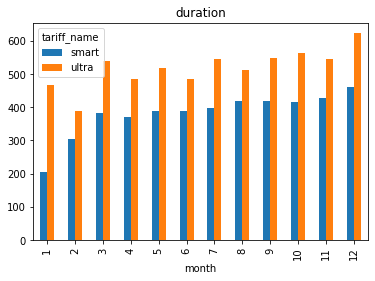

In [45]:
#строим график длительности звонков по тарифам и по месяцам
data_all.pivot_table(columns = 'tariff_name', index = 'month', values = 'duration').plot(kind = 'bar', title = 'duration')

In [46]:
#количество отправленных сообщений по тарифам и по месяцам
data_all.pivot_table(columns = 'tariff_name', index = 'month', values = 'messages_count')

tariff_name,smart,ultra
month,,
1,20.000000,43.428571
2,27.940000,37.285714
3,35.550725,47.800000
4,35.864583,45.447368
5,39.032787,50.041667
6,38.510638,50.888889
7,38.988506,61.289855
8,39.044554,58.903614
9,39.252252,63.544444


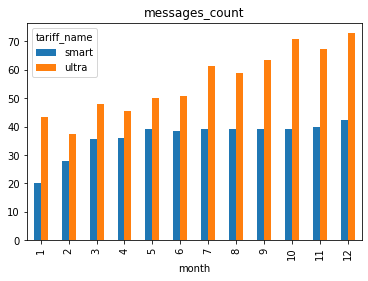

In [47]:
#строим график количества отправленных сообщений по тарифам и по месяцам
data_all.pivot_table(columns = 'tariff_name', index = 'month', values = 'messages_count').plot(kind = 'bar', title = 'messages_count')

In [48]:
#использованный трафик по тарифам и по месяцам
data_all.pivot_table(columns = 'tariff_name', index = 'month', values = 'mb_used')

tariff_name,smart,ultra
month,,
1,8690.746452,13990.481429
2,11945.662000,14894.337143
3,14647.552754,17130.774800
4,13664.040937,16823.139737
5,16162.265082,18936.769792
6,15803.148156,18484.970952
7,15831.052126,20163.091449
8,16855.002129,19392.198554
9,16380.985631,19392.511889


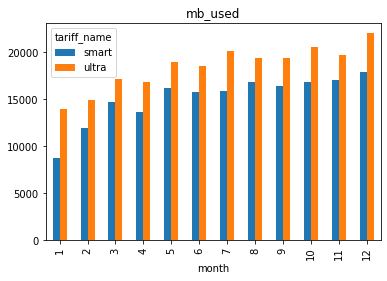

In [49]:
#строим график использованного трафика по тарифам и по месяцам
data_all.pivot_table(columns = 'tariff_name', index = 'month', values = 'mb_used').plot(kind = 'bar', title = 'mb_used')

#### Посчитаем среднее количество, дисперсию и стандартное отклонение по данным за год

In [50]:
data_all.pivot_table(index = 'tariff_name', values = ['duration', 'messages_count', 'mb_used'], aggfunc = ['mean', 'std', 'var'])

mean                                      std               \
               duration       mb_used messages_count    duration      mb_used   
tariff_name                                                                     
smart        410.155854  16253.252695      38.767102  182.499966  5795.225228   
ultra        542.209215  19598.167646      61.640957  303.301759  9630.267715   

                                     var                               
            messages_count      duration       mb_used messages_count  
tariff_name                                                            
smart            26.810513  33306.237646  3.358464e+07     718.803619  
ultra            44.816850  91991.956982  9.274206e+07    2008.550011

#### Построим гистограммы

Длительность звонков

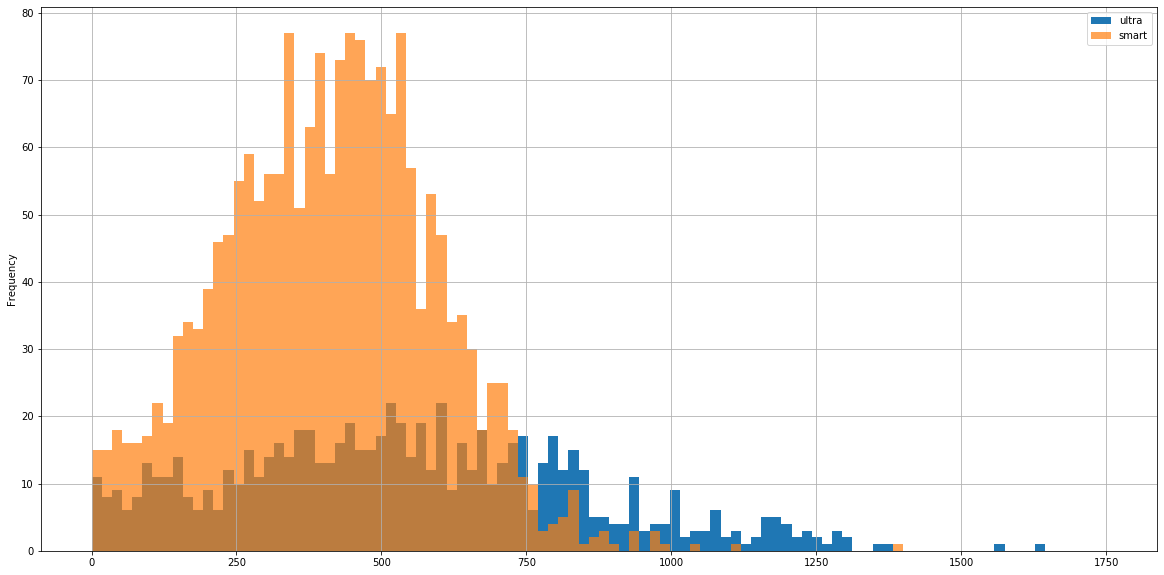

In [51]:
ax = data_all[data_all['tariff_name'] == 'ultra'].plot(kind='hist', y='duration', range=(0, 1750), bins=100, alpha=1, label='ultra', legend=True, figsize=(20, 10))
data_all[data_all['tariff_name'] == 'smart'].plot(kind='hist', y='duration', range=(0, 1750), bins=100, alpha=0.7, label='smart', ax=ax, grid=True, legend=True, figsize=(20, 10))

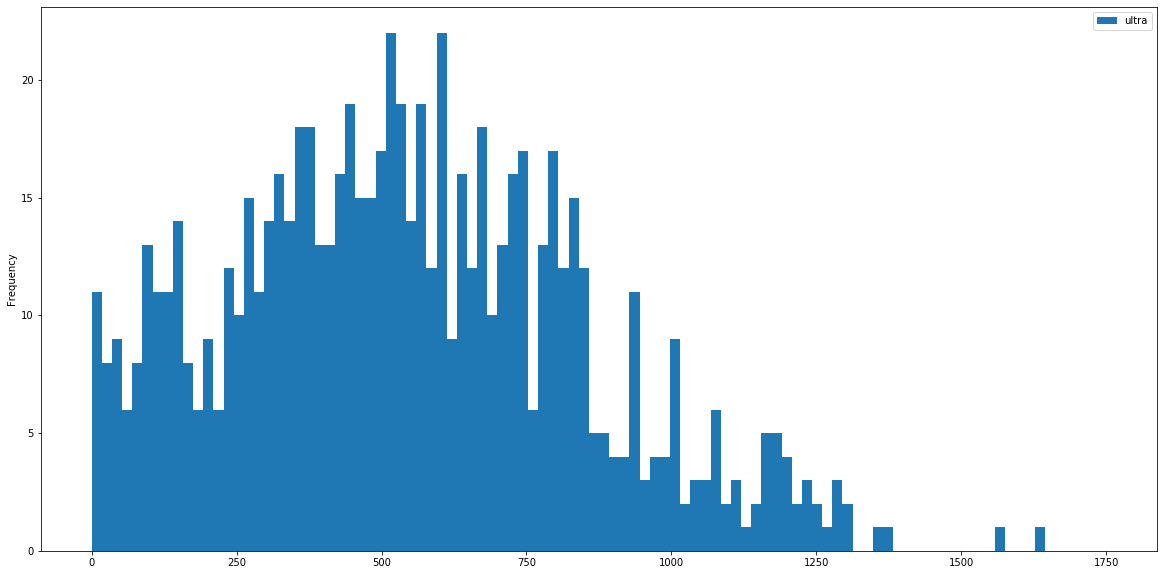

In [52]:
#построим гистограмму для Ультры на отдельном графике, чтобы в масштабе лучше определить распределение
data_all[data_all['tariff_name'] == 'ultra'].plot(kind='hist', y='duration', range=(0, 1750), bins=100, alpha=1, label='ultra', legend=True, figsize=(20, 10))

##### Для обоих тарифов по длительности разговоров характерно нормальное распределение с отрицательной скошенностью

Сообщения

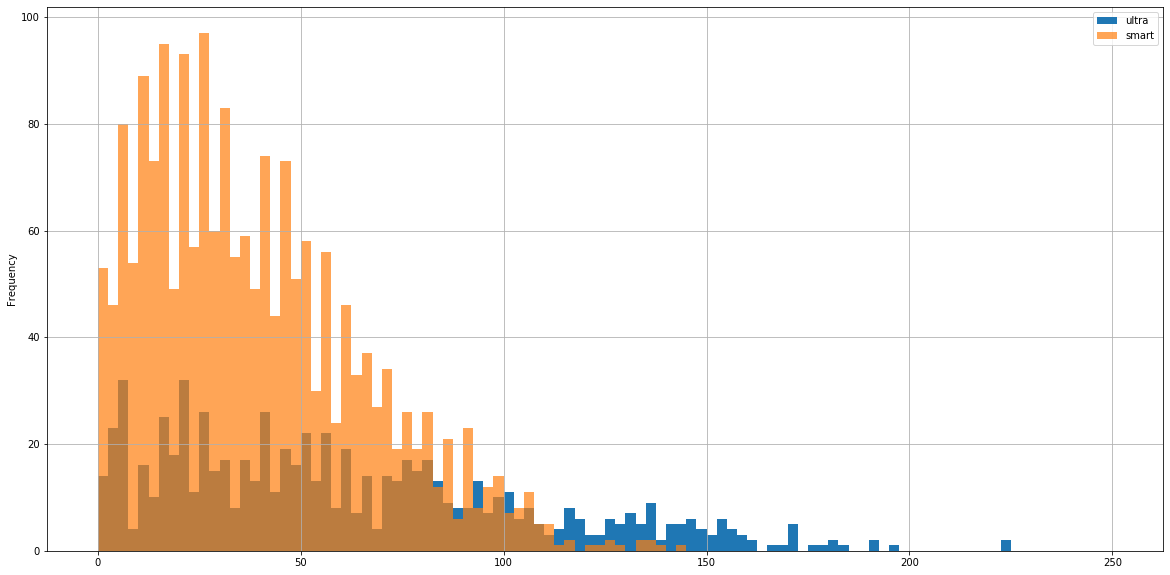

In [53]:
ax = data_all[data_all['tariff_name'] == 'ultra'].plot(kind='hist', y='messages_count', range=(0, 250), bins=100, alpha=1, label='ultra', legend=True, figsize=(20, 10))
data_all[data_all['tariff_name'] == 'smart'].plot(kind='hist', y='messages_count', range=(0, 250), bins=100, alpha=0.7, label='smart', ax=ax, grid=True, legend=True, figsize=(20, 10))

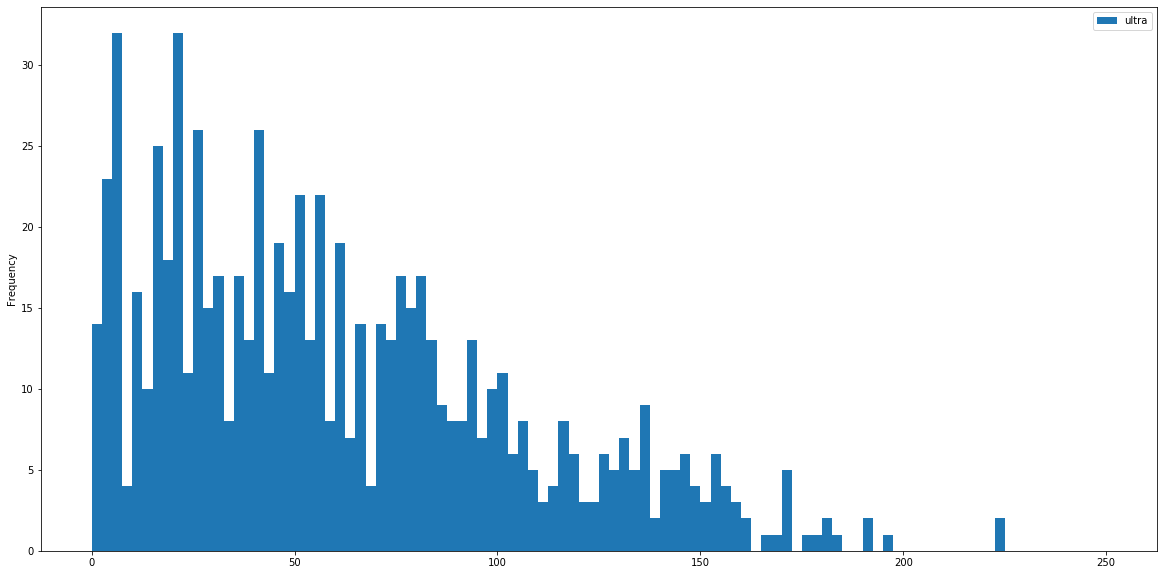

In [54]:
#построим гистограмму для Ультры на отдельном графике, чтобы в масштабе лучше определить распределение
data_all[data_all['tariff_name'] == 'ultra'].plot(kind='hist', y='messages_count', range=(0, 250), bins=100, alpha=1, label='ultra', legend=True, figsize=(20, 10))

##### Для обоих тарифов по отправленным сообщеним характерно распределение Пуасссона

Трафик интернета

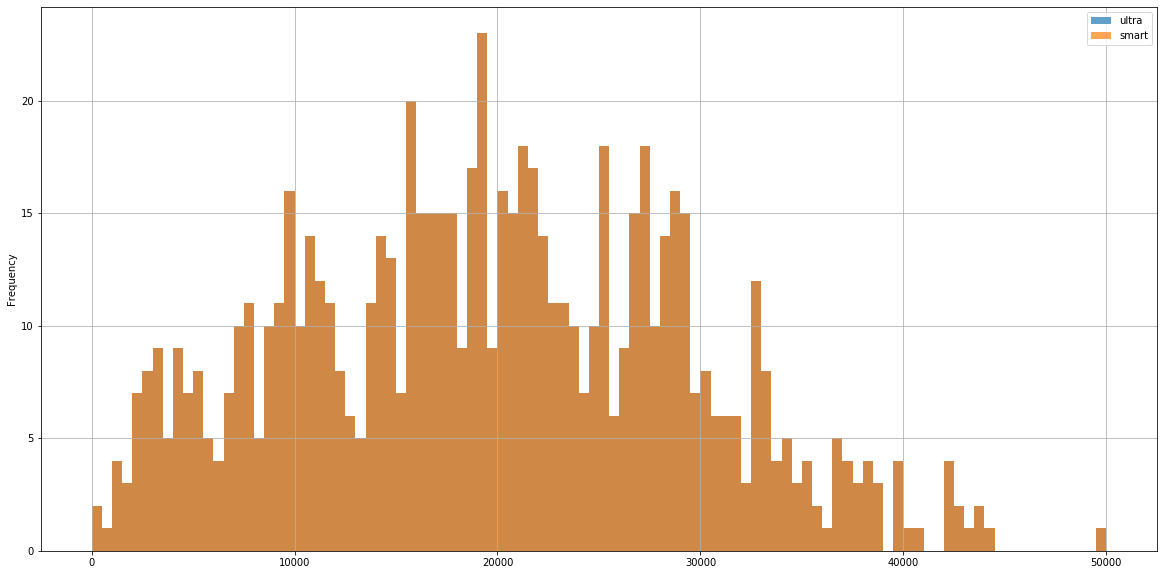

In [61]:
ax = data_all[data_all['tariff_name'] == 'ultra'].plot(kind='hist', y='mb_used', range=(0, 50000), bins=100, alpha=0.7, label='ultra', legend=True, figsize=(20, 10))
data_all[data_all['tariff_name'] == 'ultra'].plot(kind='hist', y='mb_used', range=(0, 50000), bins=100, alpha=0.7, label='smart', ax=ax, grid=True, legend=True, figsize=(20, 10))

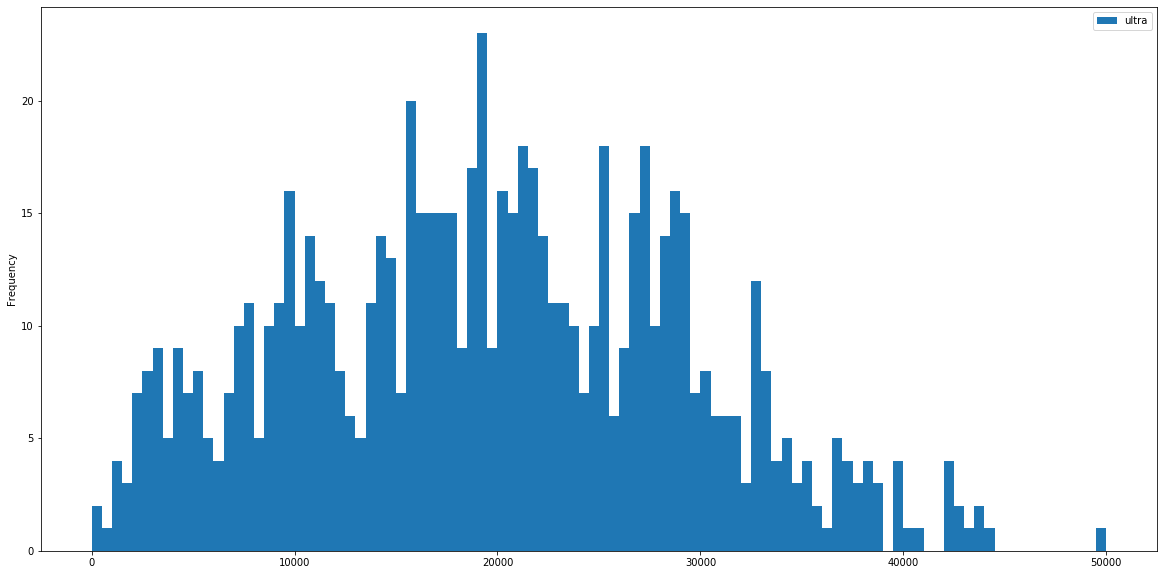

In [56]:
#построим гистограмму для Ультры на отдельном графике, чтобы в масштабе лучше определить распределение
data_all[data_all['tariff_name'] == 'ultra'].plot(kind='hist', y='mb_used', range=(0, 50000), bins=100, alpha=1, label='ultra', legend=True, figsize=(20, 10))

##### Для обоих тарифов по трафику интернета характерно нормальное распределение 

---
## Комментарий от наставника

Базовые статистические параметры получены. Сделаны верные выводы из наблюдений. Стоит прописывать их более подробно, с полученными значениями.

---

#### Шаг 4. Проверка гипотезы
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;  
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;  

Пороговое значение alpha задайте самостоятельно.  
Поясните:  
как вы формулировали нулевую и альтернативную гипотезы;  
какой критерий использовали для проверки гипотез и почему.

In [57]:
ultra_income = data_all[data_all['tariff_name'] == 'ultra']['month_income'] #выберем всю выручку по всем абонентам по тарифу Ультра
smart_income = data_all[data_all['tariff_name'] == 'smart']['month_income'] #выберем всю выручку по всем абонентам по тарифу Смарт

In [58]:
ultra_income.describe() # посмотрим общую информацию по выборке

count     752.000000
mean     2040.282489
std       314.112661
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4737.597656
Name: month_income, dtype: float64

In [59]:
smart_income.describe() # посмотрим общую информацию по выборке

count    1915.000000
mean     1216.300942
std       782.153453
min       550.000000
25%       550.000000
50%       935.367188
75%      1635.089844
max      6613.203125
Name: month_income, dtype: float64

##### Проверим гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается   

Нулевая гипотеза H<sub>0</sub> должна содержать равенство. Следовательно H<sub>0</sub> будет звучать как "средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова"  
А проверять мы будем альтернативную гипотезу H<sub>А</sub> "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"  
Если объемы выборок n≥100, то порог отклонения H<sub>0</sub> целесообразно снизить до α=0,01 и принимать решение о наличии связи (различий) при р≤0,01

In [62]:
from scipy import stats as st

In [65]:
alpha = .01 # критический уровень статистической значимости (объем выборки болше 100 - 1915 и 752 соответственно)
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    ultra_income, 
    smart_income,
    equal_var = False) #стандартное отклонение отличается более чем в 2 раза, а дисперсия соответсвенно более чем 4 раза

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3423986174495454e-261
Отвергаем нулевую гипотезу


Если нулевая H<sub>0</sub> гипотеза отвергнута, то альтернативная гипотеза H<sub>А</sub> "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" верна

---
## Комментарий от наставника

Верная проверка гипотезы. Можно также привести средние значения выручки от каждого тарифа с их доверительными интервалами.

---

##### Проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов 

Нулевая гипотеза H<sub>0</sub> должна содержать равенство. Следовательно H<sub>0</sub> будет звучать как "средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов"  
А проверять мы будем альтернативную гипотезу H<sub>А</sub> "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"  
Если объемы выборок n≥100, то порог отклонения H<sub>0</sub> целесообразно снизить до α=0,01 и принимать решение о наличии связи (различий) при р≤0,01

In [66]:
moscow_income = data_all[data_all['city'] == 'Москва']['month_income'] #выберем всю выручку по всем абонентам по региону Москва
region_income = data_all[data_all['city'] != 'Москва']['month_income'] #выберем всю выручку по всем абонентам по всем остальным регионам

In [69]:
moscow_income.describe() # посмотрим общую информацию по выборке

count     491.000000
mean     1507.341602
std       754.016035
min       550.000000
25%       714.140625
50%      1728.515625
75%      1950.000000
max      5091.742188
Name: month_income, dtype: float64

In [70]:
region_income.describe() # посмотрим общую информацию по выборке

count    2176.000000
mean     1435.387872
std       782.263583
min       550.000000
25%       655.058594
50%      1421.031250
75%      1950.000000
max      6613.203125
Name: month_income, dtype: float64

In [71]:
moscow_income.var() # посчитаем дисперсию для определения параметра equal_var

568540.1812730916

In [72]:
region_income.var() # посчитаем дисперсию для определения параметра equal_var

611936.3135256083

In [75]:
alpha = .01 # критический уровень статистической значимости (объем выборки болше 100 - 2176 и 491 соответственно)
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    moscow_income, 
    region_income,
    equal_var = False) #стандартное отклонение отличается

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0582515747988114
Не получилось отвергнуть нулевую гипотезу


Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов оказалась не верна. Скорее всего выручка не зависит от региона

### Общий вывод

Тариф "Ультра" приносит болльше прибыли: средняя выручка составляет 2040 рублей (и стандартное отклонение относительно небольшое - 314),     
у "Смарта" 1216 рублей с гораздо большим отклонением.  
Дополнительно методом статистического анализа определили, что средний доход "Ультра" по всем клиентам за все время отличается от "Смарта".   А по выборке мы видим, что среднее у "Ультра" больше - значит и по всем клиентам это утвержение верно.

---
## Комментарий от наставника

Выводы по каждому пункту описаны грамотно. Приведены ответы на главные вопросы проекта. Финальный вывод важен для обобщения проделанной работы: что было сделано, почему, какие закономерности были обнаружены и что получили. В выводах можно приводить полученные ранее значения.

---

## Комментарий от наставника

- Следует округлять все неполные значения до ближайшего целого;
- Делай больше комментариев по работе. Гипотезы, наблюдения, выводы - это большая часть работы аналитика;
- Если еще не встречался с библиотекой seaborn, то изучи ее. Можно строить презентабельные графики с ее помощью;
- Подписывай оси на графиках и сами графики. Все-таки это отчет;
- Изучи, как можно построить доверительный интревал для выборочного среднего.

Ты проделал большую работу, молодец! Продолжай в том же духе :)

-----